In [1]:
!pip install gensim

In [2]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
legal_corpus = [
"The court ruled in favor of the plaintiff.",
"The defendant was found guilty of negligence.",
"A breach of contract case was filed.",
"The agreement between parties must be honored.",
"The lawyer presented compelling evidence.",
"Legal documents must be drafted carefully.",
"The jury deliberated for several hours.",
"A settlement was reached between the parties.",
"The plaintiff claimed damages for losses incurred.",
"The contract outlined the obligations of both parties."
]

tokenized_corpus = [simple_preprocess(sentence) for sentence in legal_corpus]
legal_word2vec = Word2Vec(
  sentences=tokenized_corpus,
  vector_size=50,
  window=3,
  min_count=1,
  sg=1,
  epochs=100
)

legal_word2vec.save("legal_word2vec.model")

In [ ]:
word = "lawyer"
if word in legal_word2vec.wv:
  print(f"Vector embedding for'{word}':\n{legal_word2vec.wv[word]}\n")
else:
  print(f"Word '{word}' not found in the Word2Vec model.")

Vector embedding for'lawyer':
[ 0.00373483  0.01353383  0.00585796 -0.01324683  0.01500349 -0.01261986
  0.01892563  0.00698961 -0.0087639  -0.01023367 -0.00875896 -0.01318524
  0.01972703 -0.00463062  0.01525868 -0.01837575  0.0055629  -0.00126356
  0.01417167 -0.01969541  0.01564029 -0.00948072 -0.0107858  -0.01128642
 -0.00610619 -0.00604345 -0.00693252 -0.01396556  0.00086967 -0.00136903
 -0.00358557  0.00685404 -0.01432065 -0.00657563  0.00952303  0.01720192
 -0.01858611  0.01418636  0.01038651 -0.00818817  0.01832661 -0.01858529
  0.01404059  0.01154918  0.00326395 -0.01036671 -0.00841038 -0.00736812
  0.00374052  0.00413726]



In [ ]:
words_to_visualize = ["court", "plaintiff", "defendant", "agreement",
"lawyer", "evidence", "contract", "settlement", "jury", "damages"]
word_vectors = [legal_word2vec.wv[word] for word in words_to_visualize]
word_vectors

[array([-0.01018794, -0.0037532 , -0.01479373,  0.00535417,  0.00549183,
        -0.00194653, -0.00904275, -0.00120178,  0.01239534,  0.005502  ,
        -0.01752885, -0.00888894,  0.00678894,  0.00598825, -0.01972261,
         0.01158325, -0.01438892, -0.01200779,  0.00463451, -0.01056976,
         0.00906795,  0.01991566, -0.00384839,  0.01845003,  0.00452612,
         0.02153785,  0.0106156 , -0.0164802 , -0.0075984 ,  0.01259563,
         0.01069134,  0.01610584,  0.01608272,  0.01619358, -0.02157517,
         0.00898223, -0.00762749,  0.00642556,  0.01106042,  0.00757853,
         0.01795846,  0.00227335, -0.00347768,  0.01356644, -0.00962057,
         0.00016249,  0.01841913, -0.01246461,  0.00897428, -0.01424266],
       dtype=float32),
 array([-0.01382369,  0.0011437 , -0.01449836, -0.00296123,  0.00624782,
         0.00982854,  0.00482432,  0.00674102, -0.01035763,  0.0125059 ,
        -0.01251031,  0.00691753, -0.01420641,  0.00583739, -0.01051113,
        -0.00608784, -0.002

In [ ]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)
reduced_vectors

array([[ 0.02688162, -0.00792018],
       [ 0.00493226, -0.04934309],
       [-0.00377306, -0.04936944],
       [ 0.02256997,  0.03808062],
       [-0.0355795 , -0.01066101],
       [ 0.02682294, -0.01050709],
       [ 0.01486912,  0.0443972 ],
       [ 0.04605154,  0.01166099],
       [-0.0482769 , -0.0079725 ],
       [-0.05449799,  0.0416345 ]])

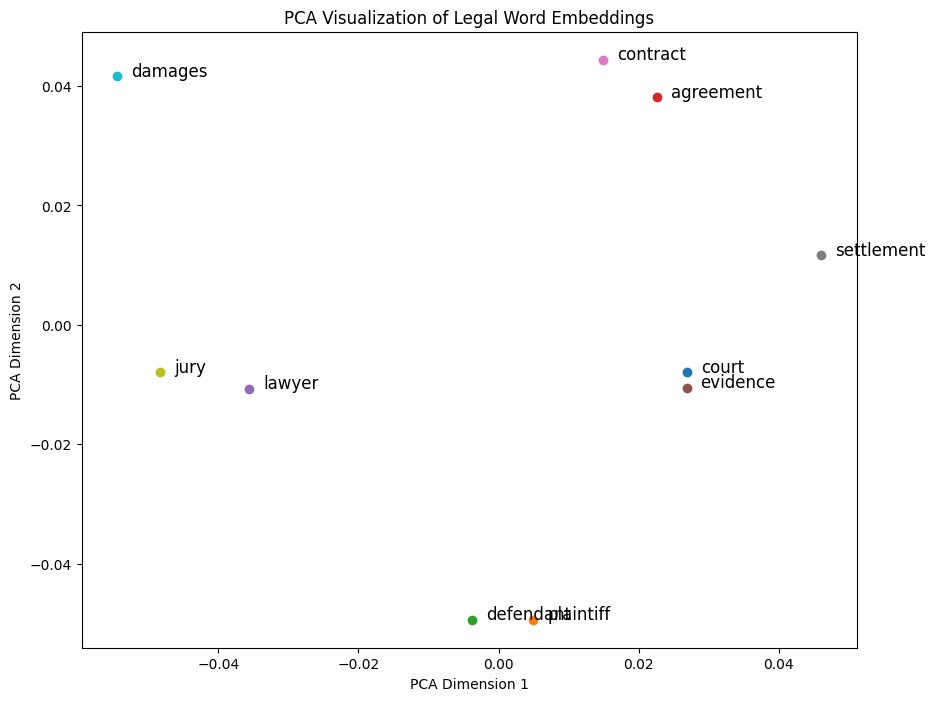

In [ ]:
plt.figure(figsize=(10, 8))
for i, word in enumerate(words_to_visualize):
  plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
  plt.text(reduced_vectors[i, 0] + 0.002, reduced_vectors[i, 1],word, fontsize=12)
plt.title("PCA Visualization of Legal Word Embeddings")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()

In [ ]:
similar_words = legal_word2vec.wv.most_similar("lawyer", topn=5)
print(f"Words similar to 'lawyer': {similar_words}")

Words similar to 'lawyer': [('carefully', 0.29186686873435974), ('claimed', 0.27888569235801697), ('jury', 0.21892617642879486), ('damages', 0.1961500644683838), ('negligence', 0.1820133775472641)]


In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
enhanced_corpus = [
"The court ordered the immediate release of the detained individual due to lack of evidence.",
"A new amendment was introduced to ensure the protection of intellectual property rights.",
"The defendant pleaded not guilty, citing an alibi supported by credible witnesses.",
"The plaintiff accused the company of violating environmental regulations.",
"A settlement agreement was reached through arbitration, avoiding a lengthy trial.",
"The legal team presented a compelling argument to overturn the previous judgment.",
"Contractual obligations must be fulfilled unless waived by mutual consent.",
"The jury found the accused guilty of fraud and embezzlement.",
"The appeal was dismissed as the evidence presented was deemed inadmissible.",
"The attorney emphasized the importance of adhering to constitutional rights.",
# Medical domain
"The patient was admitted to the emergency department with severe chest pain.",
"The surgeon successfully performed a minimally invasive procedure to remove the tumor.",
"Clinical trials showed significant improvement in patients treated with the experimental drug.",
"Regular screening is essential for early detection of chronic illnesses such as diabetes.",
"The doctor recommended physical therapy to improve mobility after surgery.",
"The hospital implemented stringent protocols to prevent the spread of infectious diseases.",
"The nurse monitored the patient's vital signs hourly to ensure stability.",
"Vaccination campaigns have drastically reduced the prevalence of polio worldwide.",
"The radiologist identified a small abnormality in the CT scan requiring further investigation.",
"Proper nutrition and exercise are vital components of a healthy lifestyle."
]
tokenized_corpus = [simple_preprocess(sentence) for sentence in enhanced_corpus]
tokenized_corpus

[['the',
  'court',
  'ordered',
  'the',
  'immediate',
  'release',
  'of',
  'the',
  'detained',
  'individual',
  'due',
  'to',
  'lack',
  'of',
  'evidence'],
 ['new',
  'amendment',
  'was',
  'introduced',
  'to',
  'ensure',
  'the',
  'protection',
  'of',
  'intellectual',
  'property',
  'rights'],
 ['the',
  'defendant',
  'pleaded',
  'not',
  'guilty',
  'citing',
  'an',
  'alibi',
  'supported',
  'by',
  'credible',
  'witnesses'],
 ['the',
  'plaintiff',
  'accused',
  'the',
  'company',
  'of',
  'violating',
  'environmental',
  'regulations'],
 ['settlement',
  'agreement',
  'was',
  'reached',
  'through',
  'arbitration',
  'avoiding',
  'lengthy',
  'trial'],
 ['the',
  'legal',
  'team',
  'presented',
  'compelling',
  'argument',
  'to',
  'overturn',
  'the',
  'previous',
  'judgment'],
 ['contractual',
  'obligations',
  'must',
  'be',
  'fulfilled',
  'unless',
  'waived',
  'by',
  'mutual',
  'consent'],
 ['the',
  'jury',
  'found',
  'the',
  'a

In [ ]:
domain_word2vec = Word2Vec(
  sentences=tokenized_corpus,
  vector_size=100,
  window=5,
  min_count=1,
  sg=1,
  epochs=150
)
domain_word2vec.save("enhanced_domain_word2vec.model")

In [ ]:
words_to_analyze = ["court", "plaintiff", "doctor", "patient","guilty", "surgery"]
for word in words_to_analyze:
  if word in domain_word2vec.wv:
    print(f"Vector embedding for'{word}':\n{domain_word2vec.wv[word]}\n")
  else:
    print(f"Word '{word}' not found in the Word2Vec model.")

Vector embedding for'court':
[-0.00520213  0.05436571  0.0196009   0.00766893  0.04851889 -0.22194375
  0.15068555  0.2671535  -0.16717364 -0.04062838 -0.054865   -0.17729442
 -0.06285486  0.16066416  0.00799252  0.00430546 -0.04130681 -0.11852198
 -0.11586928 -0.32001996  0.07377547  0.00634967  0.01555517 -0.04018658
 -0.05180506 -0.06574838  0.01809591 -0.04998898 -0.05094941  0.00987862
  0.17092119 -0.03111312  0.12419216 -0.07877786 -0.07952873  0.22328345
  0.12608306 -0.0951244  -0.07667849 -0.1501351   0.04725789 -0.15457962
 -0.06896634  0.13114625  0.11142956  0.03642106 -0.06946036 -0.02198208
  0.01422113  0.05933676  0.09983439 -0.12603386  0.07056595  0.02597529
 -0.02668819  0.0757888  -0.00033602  0.05289464 -0.16172495  0.12800941
  0.07429419  0.10103885  0.08504409 -0.01794797 -0.06241613  0.14987893
  0.15474467  0.18398537 -0.17408288  0.13962157 -0.11823418  0.09919562
  0.07957372 -0.05181967  0.15559544  0.0681076  -0.0985308   0.02557893
 -0.11090399 -0.021285

In [ ]:
selected_words = ["court", "plaintiff", "defendant", "guilty", "jury",
"patient", "doctor", "hospital", "surgery",
"emergency"]
word_vectors = [domain_word2vec.wv[word] for word in selected_words]
word_vectors

[array([-0.00520213,  0.05436571,  0.0196009 ,  0.00766893,  0.04851889,
        -0.22194375,  0.15068555,  0.2671535 , -0.16717364, -0.04062838,
        -0.054865  , -0.17729442, -0.06285486,  0.16066416,  0.00799252,
         0.00430546, -0.04130681, -0.11852198, -0.11586928, -0.32001996,
         0.07377547,  0.00634967,  0.01555517, -0.04018658, -0.05180506,
        -0.06574838,  0.01809591, -0.04998898, -0.05094941,  0.00987862,
         0.17092119, -0.03111312,  0.12419216, -0.07877786, -0.07952873,
         0.22328345,  0.12608306, -0.0951244 , -0.07667849, -0.1501351 ,
         0.04725789, -0.15457962, -0.06896634,  0.13114625,  0.11142956,
         0.03642106, -0.06946036, -0.02198208,  0.01422113,  0.05933676,
         0.09983439, -0.12603386,  0.07056595,  0.02597529, -0.02668819,
         0.0757888 , -0.00033602,  0.05289464, -0.16172495,  0.12800941,
         0.07429419,  0.10103885,  0.08504409, -0.01794797, -0.06241613,
         0.14987893,  0.15474467,  0.18398537, -0.1

In [17]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)
reduced_vectors

array([[ 0.06908131,  0.0287464 ],
       [ 0.14953919, -0.01964696],
       [-0.16693931, -0.13033459],
       [-0.0674262 , -0.16882876],
       [ 0.1574409 , -0.07644414],
       [ 0.11961383,  0.04956438],
       [-0.1142199 ,  0.10011148],
       [-0.06259862,  0.0240761 ],
       [-0.12848931,  0.12535115],
       [ 0.04399811,  0.06740492]])

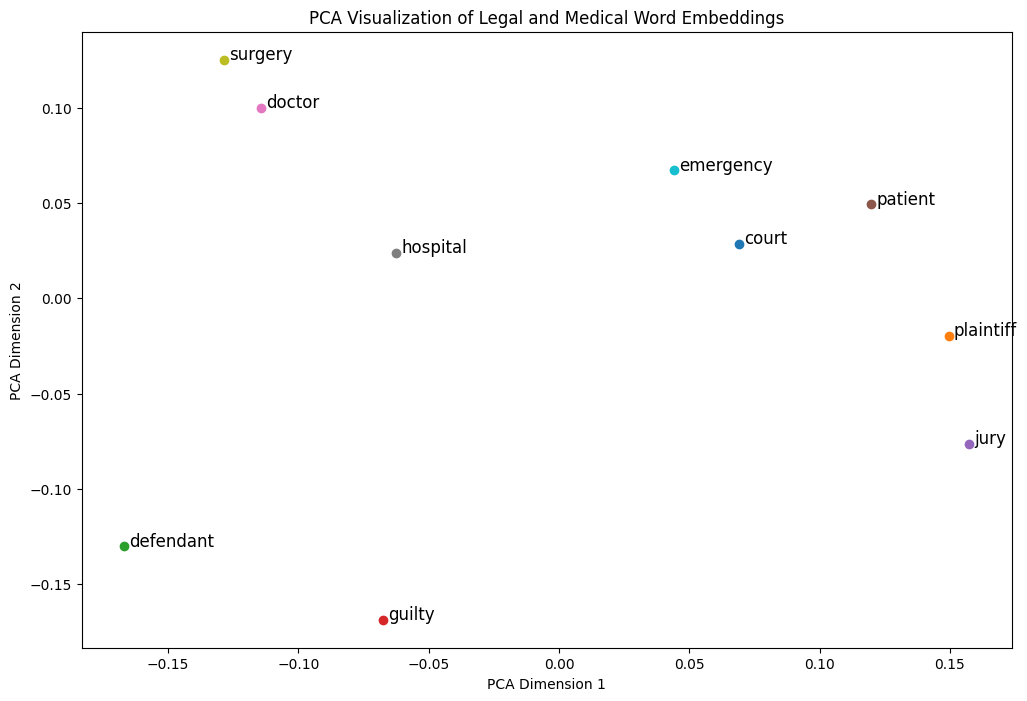

In [18]:
plt.figure(figsize=(12, 8))
for i, word in enumerate(selected_words):
  plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
  plt.text(reduced_vectors[i, 0] + 0.002, reduced_vectors[i, 1],word, fontsize=12)
plt.title("PCA Visualization of Legal and Medical Word Embeddings")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()